In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
df = pd.read_csv("D:\SupplyChainGHGEmissionFactors_v1.2_NAICS_CO2e_USD2021.csv")
df.head()

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",1.223,0.103,1.326,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",1.223,0.103,1.326,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   2017 NAICS Code                                1016 non-null   int64  
 1   2017 NAICS Title                               1016 non-null   object 
 2   GHG                                            1016 non-null   object 
 3   Unit                                           1016 non-null   object 
 4   Supply Chain Emission Factors without Margins  1016 non-null   float64
 5   Margins of Supply Chain Emission Factors       1016 non-null   float64
 6   Supply Chain Emission Factors with Margins     1016 non-null   float64
 7   Reference USEEIO Code                          1016 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 63.6+ KB


In [4]:
df.isnull().sum()

2017 NAICS Code                                  0
2017 NAICS Title                                 0
GHG                                              0
Unit                                             0
Supply Chain Emission Factors without Margins    0
Margins of Supply Chain Emission Factors         0
Supply Chain Emission Factors with Margins       0
Reference USEEIO Code                            0
dtype: int64

# Evaluate Emission Efficiency

In [5]:
# Extract relevant columns
emission_factors = df[['2017 NAICS Title', 'Supply Chain Emission Factors with Margins']]

# Sort by emission factors in descending order
sorted_emission_factors = emission_factors.sort_values(by='Supply Chain Emission Factors with Margins', ascending=False)

# Top 10 industries with highest GHG emissions per dollar spent
top_10_industries = sorted_emission_factors.head(10)

top_10_industries

,2017 NAICS Title,Supply Chain Emission Factors with Margins
865,Solid Waste Landfill,10.989
285,Cement Manufacturing,3.858
31,Cattle Feedlots,3.298
30,Beef Cattle Ranching and Farming,3.298
33,Dual-Purpose Cattle Ranching and Farming,3.298
2,Dry Pea and Bean Farming,3.007
3,Wheat Farming,3.007
4,Corn Farming,3.007
5,Rice Farming,3.007
6,Oilseed and Grain Combination Farming,3.007


In [6]:
# Calculate economic value generated per unit of GHG emitted
df['Economic Value per GHG'] = 1 / df['Supply Chain Emission Factors with Margins']

# Sort by economic value per GHG in descending order
sorted_economic_value = df[['2017 NAICS Title', 'Economic Value per GHG']].sort_values(by='Economic Value per GHG', ascending=False)

# Top 10 industries with highest economic value per unit of GHG emitted
top_10_economic_value = sorted_economic_value.head(10)

top_10_economic_value

,2017 NAICS Title,Economic Value per GHG
938,"Independent Artists, Writers, and Performers",76.923077
752,Lessors of Residential Buildings and Dwellings,52.631579
736,Direct Life Insurance Carriers,33.333333
833,Professional Employer Organizations,30.303030
832,Temporary Help Services,30.303030
831,Executive Search Services,30.303030
830,Employment Placement Agencies,30.303030
741,Reinsurance Carriers,29.411765
992,Funeral Homes and Funeral Services,29.411765
993,Cemeteries and Crematories,29.411765


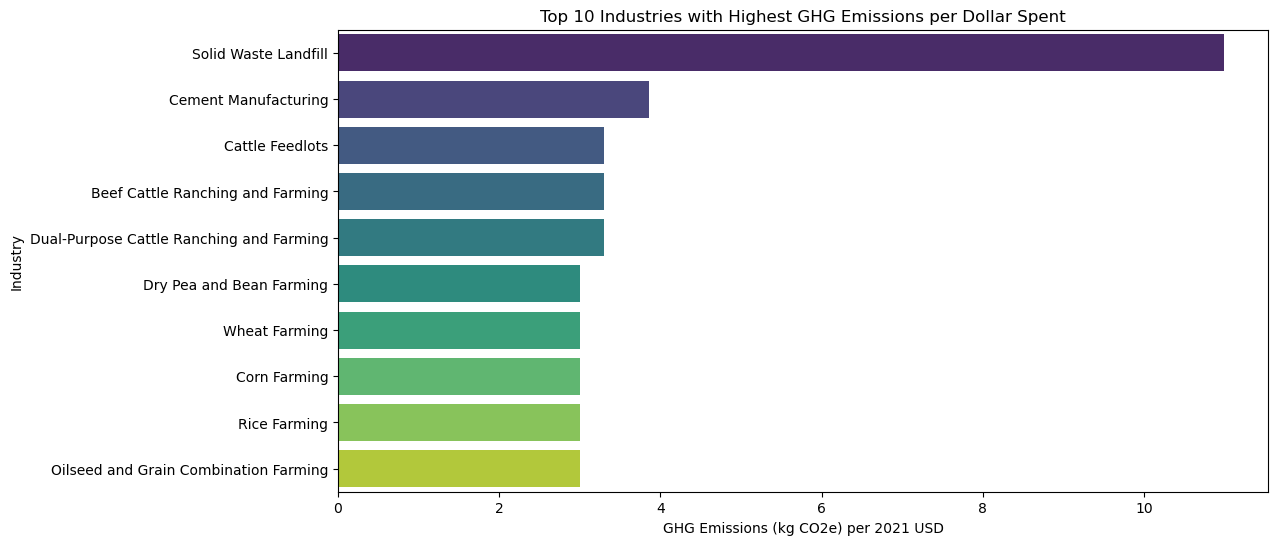

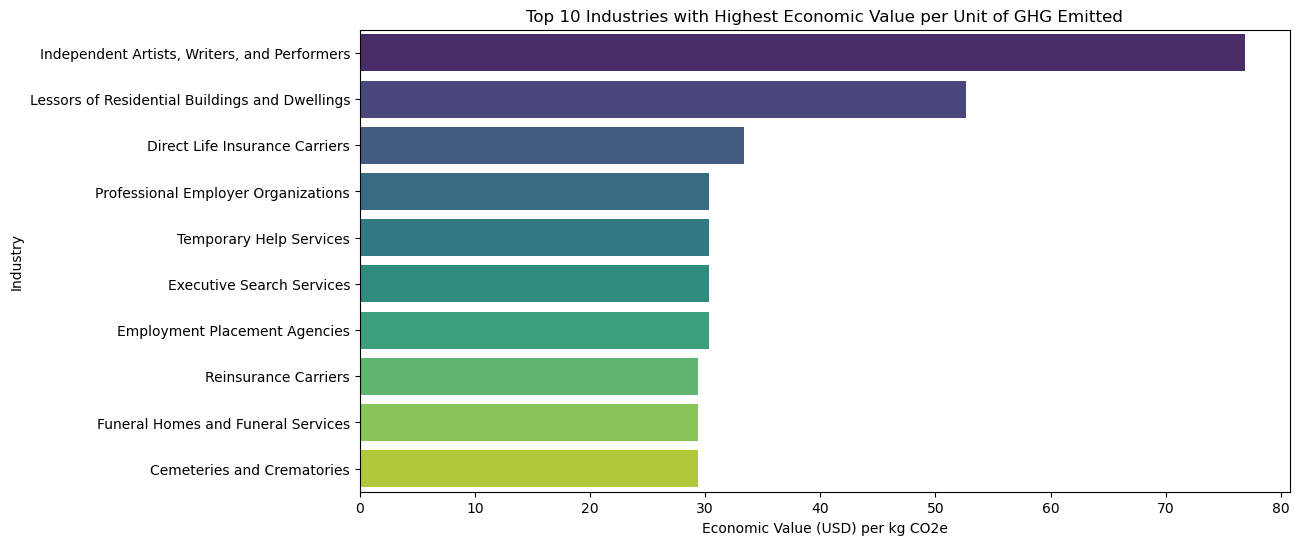

In [7]:
import seaborn as sns

# Plot top 10 industries with highest GHG emissions per dollar spent
plt.figure(figsize=(12, 6))
sns.barplot(x='Supply Chain Emission Factors with Margins', y='2017 NAICS Title', data=top_10_industries, palette='viridis')
plt.xlabel('GHG Emissions (kg CO2e) per 2021 USD')
plt.ylabel('Industry')
plt.title('Top 10 Industries with Highest GHG Emissions per Dollar Spent')
plt.show()

# Plot top 10 industries with highest economic value per unit of GHG emitted
plt.figure(figsize=(12, 6))
sns.barplot(x='Economic Value per GHG', y='2017 NAICS Title', data=top_10_economic_value, palette='viridis')
plt.xlabel('Economic Value (USD) per kg CO2e')
plt.ylabel('Industry')
plt.title('Top 10 Industries with Highest Economic Value per Unit of GHG Emitted')
plt.show()

In [8]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

       2017 NAICS Code  Supply Chain Emission Factors without Margins  \
count      1016.000000                                     1016.00000   
mean     424917.376969                                        0.35787   
std      164942.113495                                        0.55562   
min      111110.000000                                        0.01300   
25%      325588.250000                                        0.12300   
50%      423700.000000                                        0.18700   
75%      532111.250000                                        0.40150   
max      813990.000000                                       10.98900   

       Margins of Supply Chain Emission Factors  \
count                               1016.000000   
mean                                   0.028172   
std                                    0.040568   
min                                    0.000000   
25%                                    0.000000   
50%                                 

C:\Users\hp\AppData\Local\Temp\ipykernel_11320\2315840652.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


# Apply K-means Clustering

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Prepare the data for clustering
top_10_cluster_data = top_10_industries[['2017 NAICS Title', 'Supply Chain Emission Factors with Margins']].dropna()

# Standardize the data
scaler = StandardScaler()
top_10_cluster_data['Supply Chain Emission Factors with Margins'] = scaler.fit_transform(top_10_cluster_data[['Supply Chain Emission Factors with Margins']])

# Define the number of clusters
num_clusters = 3

# Fit K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
top_10_cluster_data['Cluster'] = kmeans.fit_predict(top_10_cluster_data[['Supply Chain Emission Factors with Margins']])

print(top_10_cluster_data)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


                             2017 NAICS Title  \
865                      Solid Waste Landfill   
285                      Cement Manufacturing   
31                            Cattle Feedlots   
30           Beef Cattle Ranching and Farming   
33   Dual-Purpose Cattle Ranching and Farming   
2                    Dry Pea and Bean Farming   
3                               Wheat Farming   
4                                Corn Farming   
5                                Rice Farming   
6       Oilseed and Grain Combination Farming   

     Supply Chain Emission Factors with Margins  Cluster  
865                                    2.982362        1  
285                                   -0.050873        2  
31                                    -0.289074        0  
30                                    -0.289074        0  
33                                    -0.289074        0  
2                                     -0.412853        0  
3                                     -0.412853

# Visualizing the Clusters

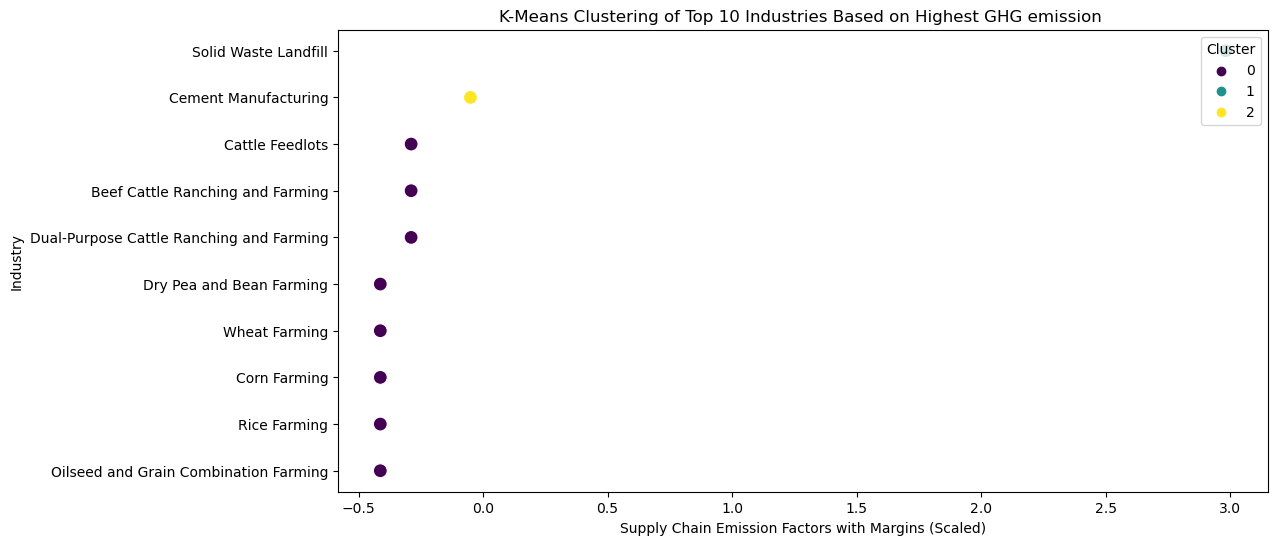

In [10]:
# Plot the clusters for top 10 industries
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Supply Chain Emission Factors with Margins', y='2017 NAICS Title', hue='Cluster', data=top_10_cluster_data, palette='viridis', s=100)
plt.xlabel('Supply Chain Emission Factors with Margins (Scaled)')
plt.ylabel('Industry')
plt.title('K-Means Clustering of Top 10 Industries Based on Highest GHG emission ')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [11]:
top_10_industries.to_csv('top_10_ghg_emissions.csv', index=False)

top_10_economic_value.to_csv('top_10_economic_value.csv', index=False)
